# Phase 1: Loading with the Right Delimiter

In [1]:
import os

In [6]:
os.listdir('../')

['Real-time Meteor Parameter Prediction and Classification',
 'traj_summary_all.txt']

In [19]:
import pandas as pd
import numpy as np

# Define the path to your large text file
file_path = '../traj_summary_all.txt'

In [20]:
# Manually create the list of column names from the header
# I've taken these from the header you provided. We might need to clean them up.
col_names = [
    'identifier', 'julian_date', 'utc_time', 'iau_no', 'iau_code', 'sol_lon',
    'app_lst', 'rageo', 'rageo_err', 'decgeo', 'decgeo_err', 'lamgeo', 'lamgeo_err',
    'betgeo', 'betgeo_err', 'vgeo', 'vgeo_err', 'lamhel', 'lamhel_err', 'bethel',
    'bethel_err', 'vhel', 'vhel_err', 'a', 'a_err', 'e', 'e_err', 'i', 'i_err',
    'peri', 'peri_err', 'node', 'node_err', 'pi', 'pi_err', 'b', 'b_err', 'q',
    'q_err', 'f', 'f_err', 'm', 'm_err', 'Q', 'Q_err', 'n', 'n_err', 'T', 'T_err',
    'tisserandJ', 'tisserandJ_err', 'raapp', 'raapp_err', 'decapp', 'decapp_err',
    'azim', 'azim_err', 'elev', 'elev_err', 'vinit', 'vinit_err', 'vavg', 'vavg_err',
    'lat_beg', 'lat_beg_err', 'lon_beg', 'lon_beg_err', 'ht_beg', 'ht_beg_err',
    'lat_end', 'lat_end_err', 'lon_end', 'lon_end_err', 'ht_end', 'ht_end_err',
    'duration', 'peak_abs_mag', 'peak_ht', 'F_param', 'mass_kg', 'Qc', 'median_fit_err',
    'beg_in_fov', 'end_in_fov', 'num_stat', 'participating_stations'
]

# The data starts after the '----' line. Let's count the header lines.
# Summary line, blank line, header, units, '---' line. That's 5 lines to skip.
# Let's try loading a small chunk first to test.
try:
    # --- THIS IS THE CORRECTED CODE ---
    # Use read_csv, the workhorse for delimited files.
    df = pd.read_csv(
        file_path,
        delimiter=';',          # The separator is a semicolon
        comment='#',            # Lines starting with '#' are comments
        header=None,            # No header row in the data itself
        names=col_names,        # Use our defined column names
        skipinitialspace=True,  # Handles whitespace after the delimiter
        low_memory=False,       # Better for mixed data types in large files
    )
    # --- END OF CORRECTION ---

    print("Successfully loaded the data using the correct parser!")
    print("DataFrame Info:")
    df.info()
    print("\nFirst 5 rows:")
    print(df.head())

except Exception as e:
    print(f"An error occurred: {e}")
    print("Please check the file_path. The parser settings should now be correct.")

Successfully loaded the data using the correct parser!
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055506 entries, 0 to 2055505
Data columns (total 86 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   identifier              object 
 1   julian_date             float64
 2   utc_time                object 
 3   iau_no                  int64  
 4   iau_code                object 
 5   sol_lon                 float64
 6   app_lst                 float64
 7   rageo                   float64
 8   rageo_err               float64
 9   decgeo                  float64
 10  decgeo_err              float64
 11  lamgeo                  float64
 12  lamgeo_err              float64
 13  betgeo                  float64
 14  betgeo_err              float64
 15  vgeo                    float64
 16  vgeo_err                float64
 17  lamhel                  float64
 18  lamhel_err              float64
 19  bethel                  float64
 2

# Phase 2: Data Cleaning and Preparation

In [21]:
df

,identifier,julian_date,utc_time,iau_no,iau_code,sol_lon,app_lst,rageo,rageo_err,decgeo,...,peak_abs_mag,peak_ht,F_param,mass_kg,Qc,median_fit_err,beg_in_fov,end_in_fov,num_stat,participating_stations
0,20181210010656_eBlUM,2.458463e+06,2018-12-10 01:06:56.588151,-1,...,257.653525,349.201136,321.76912,0.7213,57.70221,...,0.05,78.0939,0.828,0.000705,21.71,87.35,True,True,2,"US0002,US0008"
1,20181210012238_ucxkx,2.458463e+06,2018-12-10 01:22:38.227019,256,ORN,257.664602,353.489921,88.39023,0.7503,24.89956,...,2.16,92.6475,0.619,0.000031,15.75,95.30,True,True,2,"US0002,US0008"
2,20181210024213_c2bJq,2.458463e+06,2018-12-10 02:42:13.094461,-1,...,257.720774,12.964395,61.06752,0.4428,38.10011,...,0.58,90.0934,0.546,0.000143,30.01,71.35,True,True,2,"US0007,US0008"
3,20181210030753_Pprt1,2.458463e+06,2018-12-10 03:07:53.127669,-1,...,257.738890,19.573355,110.07317,0.6938,31.16050,...,1.87,98.0755,0.272,0.000024,27.21,99.06,True,True,2,"US0007,US0008"
4,20181210031154_NEWBS,2.458463e+06,2018-12-10 03:11:54.494374,-1,...,257.741729,20.162092,112.43493,6.8643,79.39052,...,0.55,91.4833,0.744,0.000076,9.82,77.86,True,True,2,"US0007,US0008"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055501,20250415031527_yOngA,2.460781e+06,2025-04-15 03:15:27.837494,-1,...,25.062238,258.476060,202.18505,0.2403,43.72347,...,1.78,81.1844,0.733,0.000110,68.84,56.74,True,True,3,"DE0001,NL0006,NL000N"
2055502,20250415032005_LpTLj,2.460781e+06,2025-04-15 03:20:05.408871,-1,...,25.065382,259.271098,9.99383,0.9349,55.11809,...,2.17,87.3889,0.503,0.000035,42.19,88.98,True,True,2,"NL000Q,NL0017"
2055503,20250415032020_HafDI,2.460781e+06,2025-04-15 03:20:20.593621,-1,...,25.065555,258.650369,121.53577,2.2625,71.65145,...,2.10,88.0237,0.417,0.000052,58.05,40.37,True,True,2,"NL000W,NL0017"
2055504,20250415032153_oXx8U,2.460781e+06,2025-04-15 03:21:53.425384,-1,...,25.066606,259.351871,265.43652,0.2431,39.67166,...,-0.66,98.7747,0.676,0.000059,69.97,13.60,True,True,3,"NL000A,NL000U,NL000W"


In [23]:
feature_cols = ['sol_lon', 'rageo', 'decgeo', 'vgeo', 'azim', 'elev']
target_col = 'iau_code'
all_cols = feature_cols + [target_col]

print(f"Selected Features (X): {feature_cols}")
print(f"Selected Target (y): {target_col}\n")

Selected Features (X): ['sol_lon', 'rageo', 'decgeo', 'vgeo', 'azim', 'elev']
Selected Target (y): iau_code



In [24]:
df_clean = df[all_cols].copy()

In [25]:
df_clean[target_col] = df_clean[target_col].str.strip()
df_clean.loc[df_clean[target_col] == '...', target_col] = 'Sporadic'

In [26]:
for col in feature_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

In [ ]:
print("--- Data Cleaning Report ---")
print("Missing values BEFORE dropping rows:")
df_clean.isnull().sum()

--- Data Cleaning Report ---
Missing values BEFORE dropping rows:


sol_lon     0
rageo       0
decgeo      0
vgeo        0
azim        0
elev        0
iau_code    0
dtype: int64

In [28]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055506 entries, 0 to 2055505
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   sol_lon   float64
 1   rageo     float64
 2   decgeo    float64
 3   vgeo      float64
 4   azim      float64
 5   elev      float64
 6   iau_code  object 
dtypes: float64(6), object(1)
memory usage: 109.8+ MB


In [31]:
df_clean[feature_cols].shape

(2055506, 6)

In [29]:
print("\nStatistical summary of our features (X):")
df_clean[feature_cols].describe()


Statistical summary of our features (X):


,sol_lon,rageo,decgeo,vgeo,azim,elev
count,2.055506e+06,2.055506e+06,2.055506e+06,2.055506e+06,2.055506e+06,2.055506e+06
mean,1.916679e+02,1.652160e+02,1.615545e+01,4.302534e+01,1.404863e+02,4.637104e+01
std,9.312314e+01,1.021016e+02,3.341232e+01,1.875313e+01,9.100252e+01,1.782037e+01
min,4.200000e-05,1.000000e-05,-8.980655e+01,2.780000e-01,5.000000e-05,-2.889905e+01
25%,1.297965e+02,7.666548e+01,-5.774687e+00,2.707926e+01,6.799263e+01,3.285509e+01
50%,2.005549e+02,1.516064e+02,1.646839e+01,4.175305e+01,1.221768e+02,4.618619e+01
75%,2.621010e+02,2.509677e+02,4.095005e+01,6.095793e+01,1.950851e+02,5.971917e+01
max,3.599999e+02,3.599996e+02,8.989223e+01,8.017046e+01,3.599989e+02,8.992782e+01


In [30]:
print("\nDistribution of our target variable (y):")
df_clean[target_col].value_counts()


Distribution of our target variable (y):


iau_code
Sporadic    1495396
PER           91618
GEM           67443
ORI           39759
SDA           20149
             ...   
M24U1            17
TVL              13
ARD               9
OZP               7
ADC               2
Name: count, Length: 397, dtype: int64

# Phase 3: Exploratory Data Analysis (EDA) & Visualizing the Physics

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
top_classes = df_clean[target_col].value_counts().nlargest(11).index
df_plot = df_clean[df_clean[target_col].isin(top_classes)].copy()

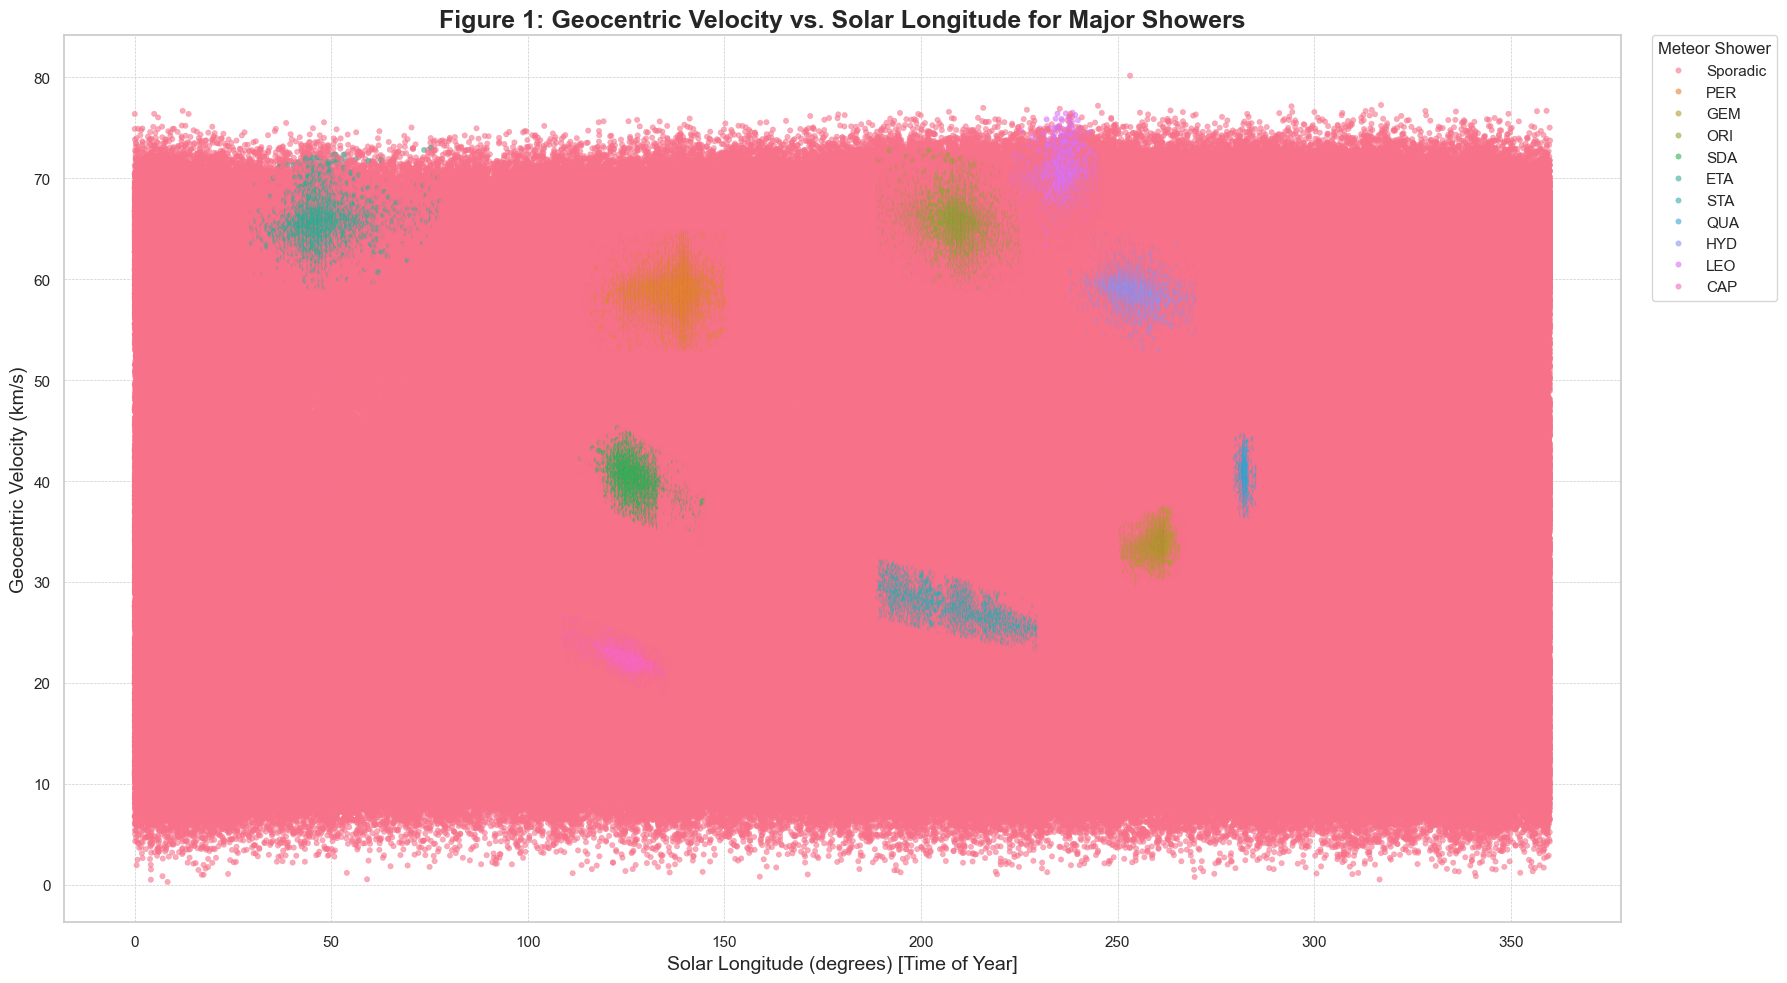

In [ ]:
# --- PLOT 1: Velocity vs. Time of Year ---
# This plot will show that showers are groups of meteors with similar velocities
# that occur at specific times of the year.

# For clarity, let's plot only the top N showers + 'Sporadic'
# We take the top 11 to include 'Sporadic' which is the most frequent.
plt.figure(figsize=(18, 10))
sns.scatterplot(
    data=df_plot,
    x='sol_lon',
    y='vgeo',
    hue=target_col,    # Color points by their shower
    s=15,              # Smaller marker size
    alpha=0.6,
    edgecolor=None,
    hue_order=top_classes # Keep a consistent color order
)
plt.title('Figure 1: Geocentric Velocity vs. Solar Longitude for Major Showers', fontsize=18, weight='bold')
plt.xlabel('Solar Longitude (degrees) [Time of Year]', fontsize=14)
plt.ylabel('Geocentric Velocity (km/s)', fontsize=14)
plt.legend(title='Meteor Shower', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

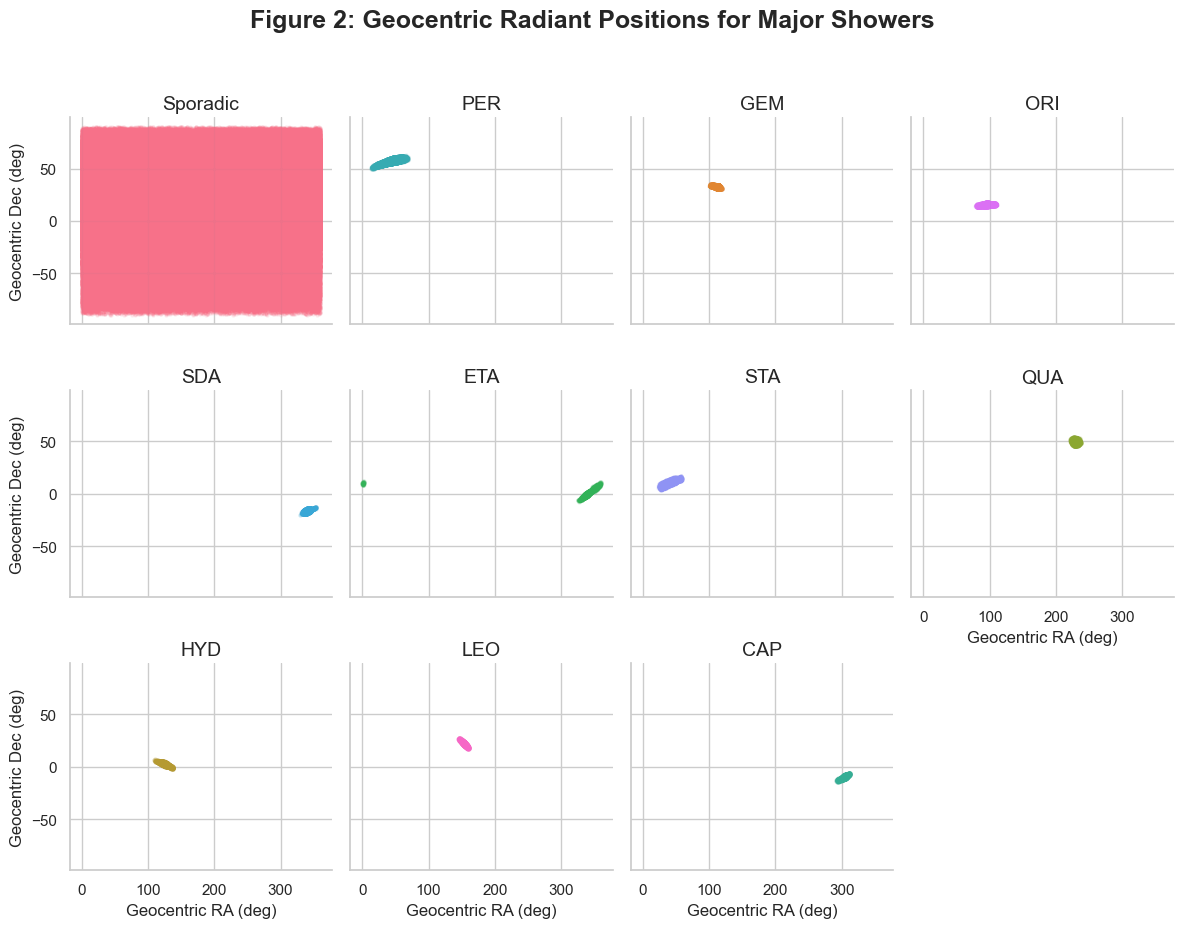

In [35]:
# --- PLOT 2: Radiant Map on the Sky ---
# This plot shows that meteors from a given shower appear to originate
# from the same point (the radiant) on the celestial sphere.

# We need to handle the 0/360 degree wrap-around for Right Ascension (RA)
# The Aitoff projection handles this well.
df_plot['rageo_rad_centered'] = np.deg2rad(df_plot['rageo'] - 180) # Center RA at 180 degrees
df_plot['decgeo_rad'] = np.deg2rad(df_plot['decgeo'])

# We will create a facet grid, one subplot for each shower, to see the clusters clearly.
g = sns.FacetGrid(df_plot, col=target_col, col_wrap=4, hue=target_col, col_order=top_classes)
g.map(plt.scatter, "rageo", "decgeo", s=5, alpha=0.1)
g.set_titles("{col_name}", size=14)
g.set_axis_labels("Geocentric RA (deg)", "Geocentric Dec (deg)")
g.fig.suptitle('Figure 2: Geocentric Radiant Positions for Major Showers', y=1.03, fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

# Phase 4: Modeling - Building the Classifier


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

In [37]:
# --- 1. PREPARE DATA FOR MODELING ---

# Let's use the df_clean from our preprocessing step.
# For simplicity and speed, let's work with the top 10 showers + 'Sporadic'
# This is the same set of classes we visualized.
top_classes = df_clean[target_col].value_counts().nlargest(11).index
model_df = df_clean[df_clean[target_col].isin(top_classes)].copy()

print(f"--- Modeling with {len(top_classes)} classes ---")
print(model_df[target_col].value_counts())

--- Modeling with 11 classes ---
iau_code
Sporadic    1495396
PER           91618
GEM           67443
ORI           39759
SDA           20149
ETA           14955
STA           13854
QUA           12202
HYD           10748
LEO            8099
CAP            7981
Name: count, dtype: int64


In [38]:
# Define Features (X) and Target (y)
X = model_df[feature_cols]
y_str = model_df[target_col]

# Encode the string labels (y) into integers (e.g., Sporadic -> 0, PER -> 1, ...)
le = LabelEncoder()
y = le.fit_transform(y_str)

In [39]:
# Split data into training and testing sets (80% train, 20% test)
# 'stratify=y' is CRITICAL for imbalanced datasets. It ensures the class
# distribution is the same in both the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
# Scale the features. This helps most models converge faster and perform better.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")


Training set shape: (1425763, 6)
Testing set shape: (356441, 6)


## XGBoost

In [ ]:
# --- 2. TRAIN THE XGBoost MODEL ---

print("\n--- Training XGBoost Classifier ---")
# Initialize the XGBoost classifier
# We use 'multi:softmax' for multi-class classification
# 'n_estimators' is the number of trees; 'max_depth' controls their complexity.
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(top_classes),
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1, # Use all available CPU cores
    random_state=42
)
# Train the model
xgb_clf.fit(X_train_scaled, y_train)
print("Model training complete.")


--- Training XGBoost Classifier ---


In [43]:
# --- 3. EVALUATE THE MODEL ---
print("\n--- Model Evaluation on Test Set ---")
y_pred = xgb_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# Print detailed classification report (Precision, Recall, F1-score)
# We need to use the original string labels for readability
class_names = le.classes_
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


--- Model Evaluation on Test Set ---
Overall Accuracy: 0.9836

Classification Report:
              precision    recall  f1-score   support

         CAP       0.87      0.97      0.92      1596
         ETA       0.92      0.98      0.95      2991
         GEM       0.96      1.00      0.98     13489
         HYD       0.88      0.98      0.92      2149
         LEO       0.87      0.94      0.90      1620
         ORI       0.90      0.98      0.94      7952
         PER       0.92      0.98      0.95     18324
         QUA       0.98      1.00      0.99      2440
         SDA       0.92      0.98      0.95      4030
         STA       0.83      0.96      0.89      2771
    Sporadic       1.00      0.98      0.99    299079

    accuracy                           0.98    356441
   macro avg       0.91      0.98      0.94    356441
weighted avg       0.98      0.98      0.98    356441



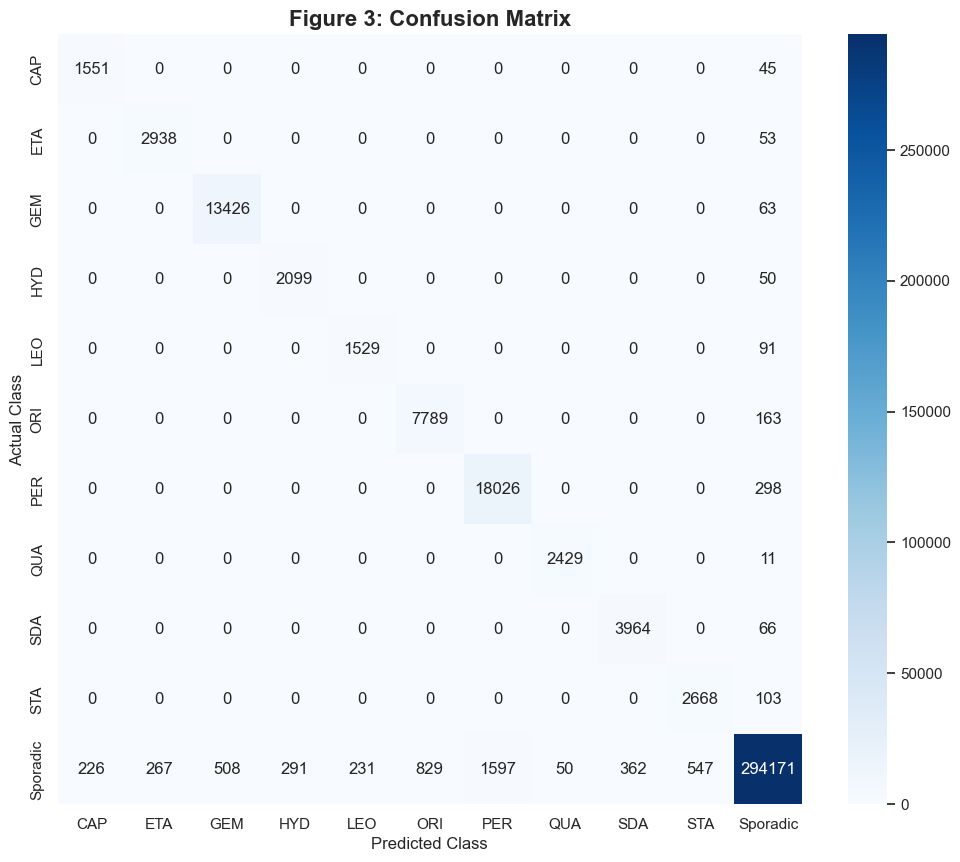

In [44]:
# --- 4. VISUALIZE RESULTS ---

# Plot 1: Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Figure 3: Confusion Matrix', fontsize=16, weight='bold')
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

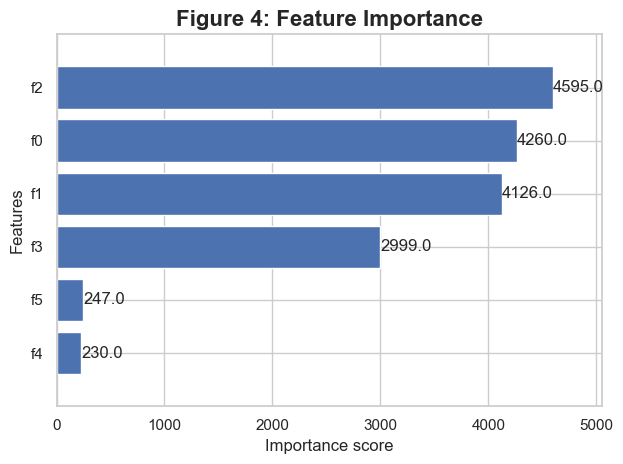

In [45]:
# Plot 2: Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_clf, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Figure 4: Feature Importance', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# make a comparison

In [46]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
models = {}
results = {}

In [47]:
# --- Model 1: Logistic Regression (Simple Baseline) ---
print("--- Training Logistic Regression ---")
start_time = time.time()
log_reg = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred_log_reg = log_reg.predict(X_test_scaled)
models['Logistic Regression'] = log_reg
results['Logistic Regression'] = {
    "accuracy": accuracy_score(y_test, y_pred_log_reg),
    "report": classification_report(y_test, y_pred_log_reg, target_names=class_names, output_dict=True),
    "training_time": end_time - start_time
}
print(f"Logistic Regression Training Time: {results['Logistic Regression']['training_time']:.2f} seconds")
print(f"Logistic Regression Accuracy: {results['Logistic Regression']['accuracy']:.4f}\n")

--- Training Logistic Regression ---
Logistic Regression Training Time: 136.24 seconds
Logistic Regression Accuracy: 0.8697



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [48]:
# --- Model 2: LightGBM (Fast Contender) ---
print("--- Training LightGBM ---")
start_time = time.time()
lgb_clf = lgb.LGBMClassifier(random_state=42, n_jobs=-1)
lgb_clf.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred_lgb = lgb_clf.predict(X_test_scaled)
models['LightGBM'] = lgb_clf
results['LightGBM'] = {
    "accuracy": accuracy_score(y_test, y_pred_lgb),
    "report": classification_report(y_test, y_pred_lgb, target_names=class_names, output_dict=True),
    "training_time": end_time - start_time
}
print(f"LightGBM Training Time: {results['LightGBM']['training_time']:.2f} seconds")
print(f"LightGBM Accuracy: {results['LightGBM']['accuracy']:.4f}\n")

--- Training LightGBM ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1425763, number of used features: 6
[LightGBM] [Info] Start training from score -5.408511
[LightGBM] [Info] Start training from score -4.780560
[LightGBM] [Info] Start training from score -3.274331
[LightGBM] [Info] Start training from score -5.110816
[LightGBM] [Info] Start training from score -5.393896
[LightGBM] [Info] Start training from score -3.802776
[LightGBM] [Info] Start training from score -2.967984
[LightGBM] [Info] Start training from score -4.983965
[LightGBM] [Info] Start training from score -4.482464
[LightGBM] [Info] Start training from score -4.857050
[LightGBM] [Info] Start training from score -0.175459


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Training Time: 22.24 seconds
LightGBM Accuracy: 0.9836



In [49]:
# --- Model 3: XGBoost (Our Champion Baseline) ---
# We'll re-run it to get a consistent timing measurement.
print("--- Training XGBoost ---")
start_time = time.time()
# Use the same parameters as before
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax', num_class=len(class_names), n_estimators=100,
    max_depth=5, learning_rate=0.1, use_label_encoder=False,
    eval_metric='mlogloss', n_jobs=-1, random_state=42
)
xgb_clf.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred_xgb = xgb_clf.predict(X_test_scaled)
models['XGBoost'] = xgb_clf
results['XGBoost'] = {
    "accuracy": accuracy_score(y_test, y_pred_xgb),
    "report": classification_report(y_test, y_pred_xgb, target_names=class_names, output_dict=True),
    "training_time": end_time - start_time
}
print(f"XGBoost Training Time: {results['XGBoost']['training_time']:.2f} seconds")
print(f"XGBoost Accuracy: {results['XGBoost']['accuracy']:.4f}\n")

--- Training XGBoost ---


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [06:10:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Training Time: 40.44 seconds
XGBoost Accuracy: 0.9836



In [50]:
# --- Summarize Results ---
results_df = pd.DataFrame(columns=['Model', 'Training Time (s)', 'Accuracy', 'F1-Score (weighted)'])
for name, res in results.items():
    results_df.loc[len(results_df)] = [
        name,
        round(res['training_time'], 2),
        round(res['accuracy'], 4),
        round(res['report']['weighted avg']['f1-score'], 4)
    ]

print("--- Comparative Results ---")
print(results_df.sort_values(by='Accuracy', ascending=False))

--- Comparative Results ---
                 Model  Training Time (s)  Accuracy  F1-Score (weighted)
1             LightGBM              22.24    0.9836               0.9836
2              XGBoost              40.44    0.9836               0.9839
0  Logistic Regression             136.24    0.8697               0.8277
